# Data Loading


## Electricity Maps. "{COUNTRY NAME} {YEAR} {INTERVAL} Carbon Intensity Data". Electricity Maps, ver. January 27, 2025, https://www.electricitymaps.com.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
us_24_daily = pd.read_csv('data/US_2024_daily.csv')

In [4]:
us_24_daily

,Datetime (UTC),Country,Zone name,Zone id,Carbon intensity gCO₂eq/kWh (direct),Carbon intensity gCO₂eq/kWh (Life cycle),Carbon-free energy percentage (CFE%),Renewable energy percentage (RE%),Data source,Data estimated,Data estimation method
0,2024-01-01 00:00:00,USA,USA,US,379.76,450.81,35.84,16.80,NaN,False,NaN
1,2024-01-02 00:00:00,USA,USA,US,365.18,435.62,37.14,18.59,NaN,False,NaN
2,2024-01-03 00:00:00,USA,USA,US,394.04,468.57,32.56,13.79,NaN,False,NaN
3,2024-01-04 00:00:00,USA,USA,US,377.14,449.35,35.46,16.52,NaN,False,NaN
4,2024-01-05 00:00:00,USA,USA,US,374.89,445.45,36.71,17.95,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27 00:00:00,USA,USA,US,346.06,411.42,42.04,21.20,NaN,False,NaN
362,2024-12-28 00:00:00,USA,USA,US,NaN,NaN,NaN,NaN,Data is not complete enough to be published.,NaN,NaN
363,2024-12-29 00:00:00,USA,USA,US,NaN,NaN,NaN,NaN,Data is not complete enough to be published.,NaN,NaN
364,2024-12-30 00:00:00,USA,USA,US,299.81,358.81,49.68,27.73,NaN,False,NaN


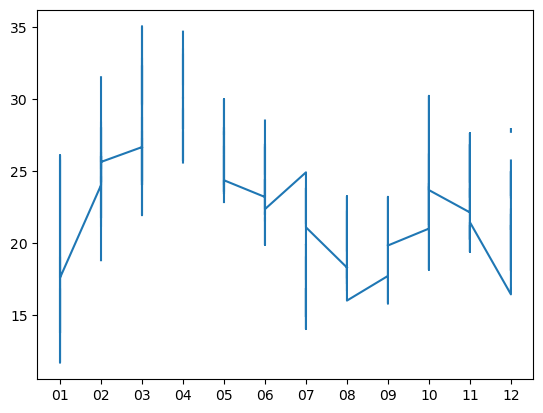

In [5]:
us_24_daily['month'] = us_24_daily['Datetime (UTC)'].str.extract('[0-9]{4}-([0-9]{2})')
plt.plot(us_24_daily['month'], us_24_daily['Renewable energy percentage (RE%)'])


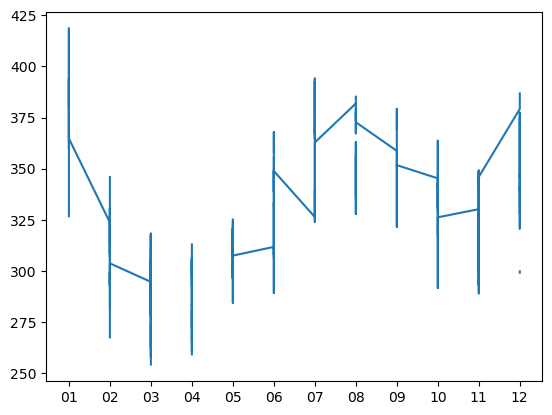

In [6]:
plt.plot(us_24_daily['month'], us_24_daily['Carbon intensity gCO₂eq/kWh (direct)'])

## EPA EGRID: https://www.epa.gov/egrid

In [7]:
egrid2023 = pd.read_csv('data/ST23_EGRID.csv')
egrid2023.head(10)

,Data Year,State abbreviation,FIPS State code,State nameplate capacity (MW),State annual heat input from combustion (MMBtu),State ozone season heat input from combustion (MMBtu),State total annual heat input (MMBtu),State total ozone season heat input (MMBtu),State annual net generation (MWh),State ozone season net generation (MWh),...,State nonbaseload oil generation percent (resource mix),State nonbaseload gas generation percent (resource mix),State nonbaseload nuclear generation percent (resource mix),State nonbaseload hydro generation percent (resource mix),State nonbaseload biomass generation percent (resource mix),State nonbaseload wind generation percent (resource mix),State nonbaseload solar generation percent (resource mix),State nonbaseload geothermal generation percent (resource mix),State nonbaseload other fossil generation percent (resource mix),State nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,PSTATABB,FIPSST,STNAMEPCAP,STHTIAN,STHTIOZ,STHTIANT,STHTIOZT,STNGENAN,STNGENOZ,...,STNBOLPR,STNBGSPR,STNBNCPR,STNBHYPR,STNBBMPR,STNBWIPR,STNBSOPR,STNBGTPR,STNBOFPR,STNBOPPR
1,2023,AK,02,"3,096","39,933,924","15,567,342","46,377,373","18,112,668","6,678,905","2,616,111",...,24.2%,60.8%,0.0%,0.0%,0.9%,0.0%,0.0%,0.0%,0.0%,0.0%
2,2023,AL,01,"32,924","685,579,328","328,809,210","1,194,819,220","545,638,094","138,596,256","62,140,624",...,0.0%,74.1%,0.0%,0.0%,3.2%,0.0%,0.0%,0.0%,0.0%,0.0%
3,2023,AR,05,"17,060","387,817,293","206,396,490","558,043,899","275,659,731","63,195,647","30,812,703",...,0.0%,46.1%,0.0%,0.0%,2.9%,0.0%,0.0%,0.0%,0.0%,0.0%
4,2023,AZ,04,"33,108","544,411,241","262,151,857","930,705,236","432,602,344","111,820,946","52,649,970",...,0.0%,77.1%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%
5,2023,CA,06,"96,731","772,978,112","318,325,751","1,315,468,607","585,767,739","216,080,236","99,524,625",...,0.1%,94.2%,0.0%,0.0%,3.1%,0.0%,0.0%,0.0%,2.0%,0.4%
6,2023,CO,08,"21,370","363,925,197","155,565,226","436,748,273","186,343,399","57,471,488","24,544,623",...,0.1%,55.9%,0.0%,0.0%,0.3%,0.0%,0.0%,0.0%,0.0%,0.0%
7,2023,CT,09,"10,965","189,301,265","83,735,375","339,554,482","140,314,470","40,652,075","16,943,777",...,1.1%,97.0%,0.0%,0.0%,1.9%,0.0%,0.0%,0.0%,0.0%,0.0%
8,2023,DC,11,57,"1,490,127","634,998","1,574,045","680,221","171,869","84,967",...,0.0%,53.6%,0.0%,0.0%,46.4%,0.0%,0.0%,0.0%,0.0%,0.0%
9,2023,DE,10,"3,441","28,665,228","16,773,726","30,628,609","17,060,760","4,772,059","2,462,275",...,5.9%,73.7%,0.0%,0.0%,0.7%,0.0%,0.0%,0.0%,0.0%,19.8%


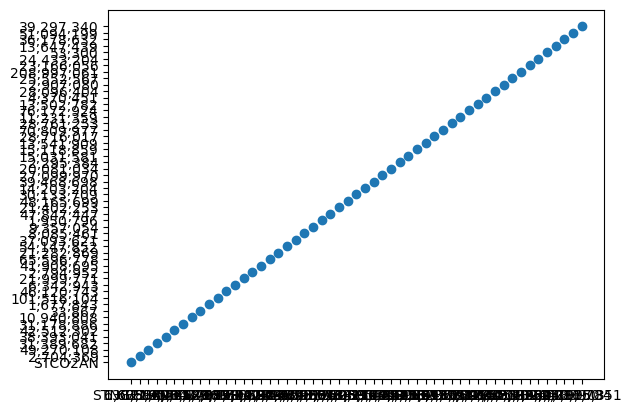

In [8]:
plt.scatter(egrid2023['State annual net generation (MWh)'], egrid2023['State annual CO2 emissions (tons)']);

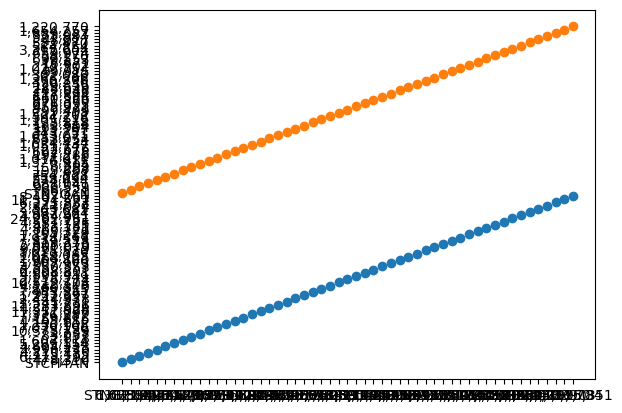

In [9]:

plt.scatter(egrid2023['State annual net generation (MWh)'], egrid2023['State annual CH4 emissions (lbs)'])
plt.scatter(egrid2023['State annual net generation (MWh)'], egrid2023['State annual N2O emissions (lbs)'])